In [48]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

H = np.random.random((10,10)) + 1j*np.random.random((10, 10))
S = np.random.random((10,10)) + 1j*np.random.random((10,10))
S = S @ S.conj().T

In [5]:
print(linalg.eigvalsh(H,S))

[-19.89295147  -2.35885972  -0.87668085  -0.05656014   0.07001781
   0.26737719   0.45715643   1.7732613    3.2956598   26.79776922]


In [10]:
print(linalg.eigvalsh(S,S))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
P = S @ linalg.funm(linalg.inv(S) @ H, lambda _: _ <= 0)

In [8]:
linalg.eigvalsh(P,S)

array([-9.59446495, -3.23223301, -1.81180545, -0.16675478, -0.02886736,
        0.37043052,  0.62686969,  1.71027372,  2.66756284, 22.54385379])

In [11]:
rho = linalg.funm(H, lambda _: _ <= 0)

In [12]:
linalg.eigvalsh(rho, S)

array([-2.73776372e+00, -9.84849739e-01, -9.26110429e-02, -1.76836176e-03,
        8.46397342e-02,  2.88908283e-01,  6.19743971e-01,  2.73469431e+00,
        5.66886786e+00,  1.15243709e+01])

In [13]:
linalg.eigvalsh(rho)

array([-1.07824027, -0.52291026, -0.11562059, -0.02770656,  0.18906673,
        0.41458723,  0.9250314 ,  1.13417851,  1.37474733,  1.70686648])

In [14]:
Pp = S @ linalg.funm(linalg.inv(S) @ H, lambda _: 1/(1+np.exp(10*(_ - 0))))

In [15]:
linalg.eigvalsh(Pp, S)

array([-1.73610783e+01, -4.11867962e+00, -1.91836290e+00, -3.33600001e-01,
        3.48004173e-02,  2.68562554e-01,  8.35287149e-01,  3.11931324e+00,
        4.93447946e+00,  4.17762659e+01])

In [16]:
rhop = linalg.funm(H, lambda _: 1/(1+np.exp(10*(_ - 0))))

In [17]:
linalg.eigvalsh(rhop, S)

array([-4.06501603e+00, -2.34918819e+00, -1.31598542e-01, -7.28751376e-03,
        2.98092797e-02,  3.21151870e-01,  4.39029123e-01,  2.64940210e+00,
        6.31502701e+00,  8.43664174e+00])

In [18]:
linalg.eigvalsh(rhop)

array([-1.37077651, -0.6509529 , -0.1883501 , -0.0660016 ,  0.09985025,
        0.41018872,  0.96393416,  1.12366574,  1.60673219,  2.00329197])

In [19]:
for eig in linalg.eigvalsh(H):
    print(1/(1+np.exp(10*eig)))

0.9999999999999578
0.9999998715254202
0.9997711444770397
0.9410835973933537
0.22869482753369091
0.006385124810924164
0.0009676998589416874
1.4509376076679102e-07
5.719098027616762e-09
4.582718504916046e-28


In [49]:
def fd(H, S, beta, mu):
    e, v = linalg.eigh(H, S)
    p = 1/(1+np.exp(beta*(e-mu)))
    print(p)
    return S @ (v * p) @ v.conj().T @ S, p

In [50]:
rho, p = fd(H,S,10,0)

[1.00000000e+00 1.00000000e+00 9.99988667e-01 9.27993650e-01
 6.50030519e-01 4.22466922e-01 1.25948500e-01 4.78564910e-06
 1.60252888e-15 8.32435589e-62]


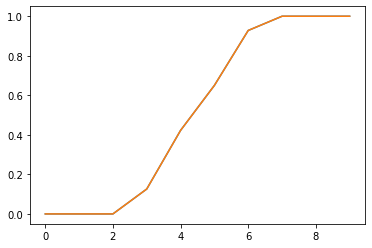

In [51]:
plt.plot(linalg.eigvalsh(rho,S))
plt.plot(p[::-1])